In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [4]:
# 일강수량(mm)   2015 ~ 2020 (6개년)
rain_dataset=[]
for year in range(2015,2021):
    url=requests.get(f'https://www.weather.go.kr/weather/climate/past_table.jsp?stn=136&yy={year}&obs=21&x=5&y=3')
    html=BeautifulSoup(url.text)
    table=html.find('table',attrs={'class':'table_develop'})
    table=pd.read_html(str(table))[0]
    table=table.fillna(0.0)
    table.index=[i for i in range(1,33)]
    table.rename(columns={'Unnamed: 0':'Date'},inplace=True)
    table=table.drop(32)
    rain_dataset.append(table)    
rain_dataset    

[   Date   1월    2월    3월    4월    5월    6월    7월    8월   9월   10월   11월  12월
 1    1일  0.0   0.0   2.0   2.0   0.0   0.0   1.0  26.5  0.3  22.5   0.0  0.0
 2    2일  0.0   0.0   0.0   0.5   0.0   0.0   0.0   0.1  2.5   0.0   0.0  3.0
 3    3일  0.0   0.0   0.0   2.5   4.0   0.0   0.0   0.0  0.0   0.0   0.0  0.5
 4    4일  0.0   0.0   0.0   9.5   0.0   0.0   0.0   0.0  0.0   0.0   0.0  0.0
 5    5일  0.1   0.0   0.0   6.0   0.0   3.5   0.0   0.0  4.5   0.0   0.0  0.0
 6    6일  3.0   0.0   0.0   1.5   0.0   0.0   1.0   0.0  2.0   0.0   1.5  0.0
 7    7일  0.0   0.0   0.0   0.0   0.0   0.0  17.5   0.0  0.0   0.0  14.0  0.0
 8    8일  0.0   0.0   0.0   0.0   0.0   0.0  52.0  62.0  0.0   0.0  15.5  3.0
 9    9일  0.0   0.0   0.0   0.0   0.0   0.0  13.0   0.0  0.0   0.0   1.5  0.0
 10  10일  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.1   0.0  7.5
 11  11일  0.1   0.0   0.0   0.0   6.5   0.0   0.4   0.0  0.0   2.5   0.0  2.5
 12  12일  0.0   0.0   0.0   0.0  14.0   0.0   7.5   1.0  2.0   0

In [5]:
rain_dataset[0]

,Date,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,1일,0.0,0.0,2.0,2.0,0.0,0.0,1.0,26.5,0.3,22.5,0.0,0.0
2,2일,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.1,2.5,0.0,0.0,3.0
3,3일,0.0,0.0,0.0,2.5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,4일,0.0,0.0,0.0,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5일,0.1,0.0,0.0,6.0,0.0,3.5,0.0,0.0,4.5,0.0,0.0,0.0
6,6일,3.0,0.0,0.0,1.5,0.0,0.0,1.0,0.0,2.0,0.0,1.5,0.0
7,7일,0.0,0.0,0.0,0.0,0.0,0.0,17.5,0.0,0.0,0.0,14.0,0.0
8,8일,0.0,0.0,0.0,0.0,0.0,0.0,52.0,62.0,0.0,0.0,15.5,3.0
9,9일,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,1.5,0.0
10,10일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,7.5


In [6]:
rain_total=[]
for year in [2015,2016,2017,2018,2019,2020]:
    year_data=pd.DataFrame()
    for month in range(1,13):
        date_index=["{0:d}-{1:02d}-{2:02d}".format(year,month,k) for k in range(1,32)]
        month_data = rain_dataset[year-2015].pivot_table(index=['Date'],values=['{0}월'.format(month)])
        month_data = month_data.reindex(index=['{0}일'.format(k) for k in range(1,32)])
        month_data['측정일시']=date_index
        month_data.rename(columns={'{}월'.format(month):"일강수량(mm)"},inplace=True)
        year_data=pd.concat([year_data,month_data])
    rain_total.append(year_data)
rain_final=pd.concat(rain_total)
rain_final=pd.DataFrame(rain_final)
rain_final

,일강수량(mm),측정일시
Date,,
1일,0.0,2015-01-01
2일,0.0,2015-01-02
3일,0.0,2015-01-03
4일,0.0,2015-01-04
5일,0.1,2015-01-05
...,...,...
27일,0.0,2020-12-27
28일,0.0,2020-12-28
29일,0.2,2020-12-29


In [8]:
# 2015_2017_수질정보
y_2015_2017_water=pd.read_csv('안동_2015_2017_수질정보.csv',encoding="cp949")
for i in range(0,len(y_2015_2017_water)):
    if y_2015_2017_water.iloc[i,4] == 'ND':
        y_2015_2017_water.iloc[i,4]= np.NaN
y_2015_2017_water.iloc[:,4] = y_2015_2017_water.iloc[:,4].values.astype('float')
y_2015_2017_water = y_2015_2017_water.dropna(thresh=3)
y_2015_2017_water=y_2015_2017_water.interpolate(method='linear',limit_direction='forward')
y_2015_2017_water=y_2015_2017_water.interpolate(method='linear',limit_direction='backward')
y_2015_2017_water

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L)
0,2015-01-01,안동댐하류,10.0,2.610,0.008000
1,2015-01-02,안동댐하류,9.8,2.559,0.009000
2,2015-01-03,안동댐하류,9.8,2.509,0.008000
3,2015-01-04,안동댐하류,9.6,2.564,0.008000
4,2015-01-05,안동댐하류,9.4,2.573,0.009000
...,...,...,...,...,...
1091,2017-12-27,안동댐하류,8.2,1.784,0.013333
1092,2017-12-28,안동댐하류,7.7,1.826,0.015667
1093,2017-12-29,안동댐하류,7.8,1.957,0.018000
1094,2017-12-30,안동댐하류,7.9,1.963,0.018000


In [9]:
# 2018_2020_수질정보
y_2018_2020_water=pd.read_csv('안동_2018_2020_수질정보.csv',encoding="cp949")
for i in range(0,len(y_2018_2020_water)):
    if y_2018_2020_water.iloc[i,4] == 'ND':
        y_2018_2020_water.iloc[i,4]= np.NaN
y_2018_2020_water.iloc[:,4] = y_2018_2020_water.iloc[:,4].values.astype('float')
y_2018_2020_water = y_2018_2020_water.dropna(thresh=3)
y_2018_2020_water=y_2018_2020_water.interpolate(method='linear',limit_direction='forward')
y_2018_2020_water=y_2018_2020_water.interpolate(method='linear',limit_direction='backward')
y_2018_2020_water

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L)
0,2018-01-01,안동댐하류,8.3,1.952,0.018
1,2018-01-02,안동댐하류,8.3,1.929,0.018
2,2018-01-03,안동댐하류,9.3,1.904,0.019
3,2018-01-04,안동댐하류,7.8,2.007,0.018
4,2018-01-05,안동댐하류,7.8,2.128,0.018
...,...,...,...,...,...
1089,2020-12-27,안동댐하류,8.5,1.516,0.006
1090,2020-12-28,안동댐하류,8.5,1.533,0.007
1091,2020-12-29,안동댐하류,8.6,1.626,0.006
1092,2020-12-30,안동댐하류,8.1,1.648,0.011


In [10]:
# total_수질정보
y_total_water = y_2015_2017_water.append(y_2018_2020_water,ignore_index=True)
y_total_water['측정연도'] = [pd.to_datetime(y_total_water['측정일시'][i]).year for i in range(0,len(y_total_water))]
y_total_water['측정월'] = [pd.to_datetime(y_total_water['측정일시'][i]).month for i in range(0,len(y_total_water))]
y_total_water

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L),측정연도,측정월
0,2015-01-01,안동댐하류,10.0,2.610,0.008,2015,1
1,2015-01-02,안동댐하류,9.8,2.559,0.009,2015,1
2,2015-01-03,안동댐하류,9.8,2.509,0.008,2015,1
3,2015-01-04,안동댐하류,9.6,2.564,0.008,2015,1
4,2015-01-05,안동댐하류,9.4,2.573,0.009,2015,1
...,...,...,...,...,...,...,...
2143,2020-12-27,안동댐하류,8.5,1.516,0.006,2020,12
2144,2020-12-28,안동댐하류,8.5,1.533,0.007,2020,12
2145,2020-12-29,안동댐하류,8.6,1.626,0.006,2020,12
2146,2020-12-30,안동댐하류,8.1,1.648,0.011,2020,12


In [11]:
y_2018_2020_water.to_csv("C:/myPyCode/y_2018_2020_water.csv",encoding='cp949')

In [12]:
y_2015_2017_water.to_csv("C:/myPyCode/y_2015_2017_water.csv",encoding='cp949')

In [13]:
y_total_water.to_csv("C:/myPyCode/y_total_water.csv",encoding='cp949')

In [14]:
y_total_water.describe()

,용존산소(mg/L),총질소(mg/L),총인(mg/L),측정연도,측정월
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,8.923580,1.785333,0.011638,2017.482309,6.534916
std,2.693343,0.459659,0.020058,1.704583,3.459687
min,1.500000,0.893000,0.002000,2015.000000,1.000000
25%,7.300000,1.465000,0.005000,2016.000000,4.000000
50%,9.100000,1.692000,0.007000,2017.000000,7.000000
75%,11.000000,2.045500,0.011000,2019.000000,10.000000
max,17.400000,5.266000,0.309000,2020.000000,12.000000


In [15]:
water_total=pd.merge(y_total_water,rain_final,how='left',on='측정일시')
water_total

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L),측정연도,측정월,일강수량(mm)
0,2015-01-01,안동댐하류,10.0,2.610,0.008,2015,1,0.0
1,2015-01-02,안동댐하류,9.8,2.559,0.009,2015,1,0.0
2,2015-01-03,안동댐하류,9.8,2.509,0.008,2015,1,0.0
3,2015-01-04,안동댐하류,9.6,2.564,0.008,2015,1,0.0
4,2015-01-05,안동댐하류,9.4,2.573,0.009,2015,1,0.1
...,...,...,...,...,...,...,...,...
2143,2020-12-27,안동댐하류,8.5,1.516,0.006,2020,12,0.0
2144,2020-12-28,안동댐하류,8.5,1.533,0.007,2020,12,0.0
2145,2020-12-29,안동댐하류,8.6,1.626,0.006,2020,12,0.2
2146,2020-12-30,안동댐하류,8.1,1.648,0.011,2020,12,0.0


In [16]:
water_total.to_csv("C:/myPyCode/water_total.csv",encoding='cp949')

In [18]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [24]:
water_total

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L),측정연도,측정월,일강수량(mm)
0,2015-01-01,안동댐하류,10.0,2.610,0.008,2015,1,0.0
1,2015-01-02,안동댐하류,9.8,2.559,0.009,2015,1,0.0
2,2015-01-03,안동댐하류,9.8,2.509,0.008,2015,1,0.0
3,2015-01-04,안동댐하류,9.6,2.564,0.008,2015,1,0.0
4,2015-01-05,안동댐하류,9.4,2.573,0.009,2015,1,0.1
...,...,...,...,...,...,...,...,...
2143,2020-12-27,안동댐하류,8.5,1.516,0.006,2020,12,0.0
2144,2020-12-28,안동댐하류,8.5,1.533,0.007,2020,12,0.0
2145,2020-12-29,안동댐하류,8.6,1.626,0.006,2020,12,0.2
2146,2020-12-30,안동댐하류,8.1,1.648,0.011,2020,12,0.0


In [45]:
# 안동시_2015_2020_인구수데이터
pop=pd.read_csv('안동시_2015_2020_인구수데이터.csv',encoding='cp949')
print(pop.columns)
pop

Index(['행정구역(시군구)별', '2015. 01', '2015. 01.1', '2015. 01.2', '2015. 02',
       '2015. 02.1', '2015. 02.2', '2015. 03', '2015. 03.1', '2015. 03.2',
       ...
       '2020. 09.2', '2020. 10', '2020. 10.1', '2020. 10.2', '2020. 11',
       '2020. 11.1', '2020. 11.2', '2020. 12', '2020. 12.1', '2020. 12.2'],
      dtype='object', length=217)


,행정구역(시군구)별,2015. 01,2015. 01.1,2015. 01.2,2015. 02,2015. 02.1,2015. 02.2,2015. 03,2015. 03.1,2015. 03.2,...,2020. 09.2,2020. 10,2020. 10.1,2020. 10.2,2020. 11,2020. 11.1,2020. 11.2,2020. 12,2020. 12.1,2020. 12.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),...,여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,경상북도,2699275,1355546,1343729,2698469,1355236,1343233,2697302,1354636,1342666,...,1310595,2639763,1329257,1310506,2639245,1328939,1310306,2639422,1329211,1310211
2,안동시,168238,82989,85249,168142,82939,85203,168129,82929,85200,...,80225,158834,78669,80165,158803,78632,80171,158907,78661,80246


In [46]:
years=[2015,2016,2017,2018,2019,2020]
months=[i for i in range(1,13)]
for year in years:
    for month in months:
        pop=pop.drop('{0}. {1:02d}.1'.format(year,month),axis=1)
for year in years:
    for month in months:
        pop=pop.drop('{0}. {1:02d}.2'.format(year,month),axis=1)        
pop

,행정구역(시군구)별,2015. 01,2015. 02,2015. 03,2015. 04,2015. 05,2015. 06,2015. 07,2015. 08,2015. 09,...,2020. 03,2020. 04,2020. 05,2020. 06,2020. 07,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12
0,행정구역(시군구)별,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),...,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명)
1,경상북도,2699275,2698469,2697302,2696837,2696674,2697791,2698899,2699955,2700461,...,2653418,2651054,2648760,2646493,2644001,2640932,2640003,2639763,2639245,2639422
2,안동시,168238,168142,168129,168224,168289,168242,168276,168282,168240,...,159338,159035,158820,158526,158765,158867,158929,158834,158803,158907


In [49]:
pop=pop.drop(0); pop=pop.drop(1)

KeyError: '[0] not found in axis'

In [51]:
pop=pop.drop('행정구역(시군구)별',axis=1)
pop

,2015. 01,2015. 02,2015. 03,2015. 04,2015. 05,2015. 06,2015. 07,2015. 08,2015. 09,2015. 10,...,2020. 03,2020. 04,2020. 05,2020. 06,2020. 07,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12
2,168238,168142,168129,168224,168289,168242,168276,168282,168240,168171,...,159338,159035,158820,158526,158765,158867,158929,158834,158803,158907


In [60]:
pop.index=['인구수']

In [113]:
population=pop.T
population['인구수']=population['인구수'].astype(int)
population.info()
population

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2015. 01 to 2020. 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   인구수     72 non-null     int32
dtypes: int32(1)
memory usage: 2.9+ KB


,인구수
2015. 01,168238
2015. 02,168142
2015. 03,168129
2015. 04,168224
2015. 05,168289
...,...
2020. 08,158867
2020. 09,158929
2020. 10,158834
2020. 11,158803


In [115]:
population['월']=population.index
population['월']=population['월'].str.replace('. ','-',regex=False)
population

,인구수,월
2015. 01,168238,2015-01
2015. 02,168142,2015-02
2015. 03,168129,2015-03
2015. 04,168224,2015-04
2015. 05,168289,2015-05
...,...,...
2020. 08,158867,2020-08
2020. 09,158929,2020-09
2020. 10,158834,2020-10
2020. 11,158803,2020-11


In [117]:
population.to_csv('C:/myPyCode/안동시_인구수_전처리.csv',encoding='cp949')

In [111]:
water_total['월']=[water_total['측정일시'].str.rsplit('-',n=1)[i][0] for i in range(0,len(water_total))]
water_total

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L),측정연도,측정월,일강수량(mm),월
0,2015-01-01,안동댐하류,10.0,2.610,0.008,2015,1,0.0,2015-01
1,2015-01-02,안동댐하류,9.8,2.559,0.009,2015,1,0.0,2015-01
2,2015-01-03,안동댐하류,9.8,2.509,0.008,2015,1,0.0,2015-01
3,2015-01-04,안동댐하류,9.6,2.564,0.008,2015,1,0.0,2015-01
4,2015-01-05,안동댐하류,9.4,2.573,0.009,2015,1,0.1,2015-01
...,...,...,...,...,...,...,...,...,...
2143,2020-12-27,안동댐하류,8.5,1.516,0.006,2020,12,0.0,2020-12
2144,2020-12-28,안동댐하류,8.5,1.533,0.007,2020,12,0.0,2020-12
2145,2020-12-29,안동댐하류,8.6,1.626,0.006,2020,12,0.2,2020-12
2146,2020-12-30,안동댐하류,8.1,1.648,0.011,2020,12,0.0,2020-12


In [120]:
water_total=pd.merge(water_total,population,how='left',on='월')
water_total=water_total.drop('월',axis=1)

In [124]:
water_total=water_total.drop('인구수_x',axis=1)

KeyError: "['인구수_x'] not found in axis"

In [125]:
water_total=water_total.drop('인구수_y',axis=1)

In [133]:
water_total.rename(columns={'인구수':'인구수(월별)'},inplace=True)

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L),측정연도,측정월,일강수량(mm),인구수(월별)
0,2015-01-01,안동댐하류,10.0,2.610,0.008,2015,1,0.0,168238
1,2015-01-02,안동댐하류,9.8,2.559,0.009,2015,1,0.0,168238
2,2015-01-03,안동댐하류,9.8,2.509,0.008,2015,1,0.0,168238
3,2015-01-04,안동댐하류,9.6,2.564,0.008,2015,1,0.0,168238
4,2015-01-05,안동댐하류,9.4,2.573,0.009,2015,1,0.1,168238
...,...,...,...,...,...,...,...,...,...
2143,2020-12-27,안동댐하류,8.5,1.516,0.006,2020,12,0.0,158907
2144,2020-12-28,안동댐하류,8.5,1.533,0.007,2020,12,0.0,158907
2145,2020-12-29,안동댐하류,8.6,1.626,0.006,2020,12,0.2,158907
2146,2020-12-30,안동댐하류,8.1,1.648,0.011,2020,12,0.0,158907


In [134]:
water_total.to_csv("C:/myPyCode/water_total.csv",encoding='cp949')

In [135]:
water_total

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L),측정연도,측정월,일강수량(mm),인구수(월별)
0,2015-01-01,안동댐하류,10.0,2.610,0.008,2015,1,0.0,168238
1,2015-01-02,안동댐하류,9.8,2.559,0.009,2015,1,0.0,168238
2,2015-01-03,안동댐하류,9.8,2.509,0.008,2015,1,0.0,168238
3,2015-01-04,안동댐하류,9.6,2.564,0.008,2015,1,0.0,168238
4,2015-01-05,안동댐하류,9.4,2.573,0.009,2015,1,0.1,168238
...,...,...,...,...,...,...,...,...,...
2143,2020-12-27,안동댐하류,8.5,1.516,0.006,2020,12,0.0,158907
2144,2020-12-28,안동댐하류,8.5,1.533,0.007,2020,12,0.0,158907
2145,2020-12-29,안동댐하류,8.6,1.626,0.006,2020,12,0.2,158907
2146,2020-12-30,안동댐하류,8.1,1.648,0.011,2020,12,0.0,158907


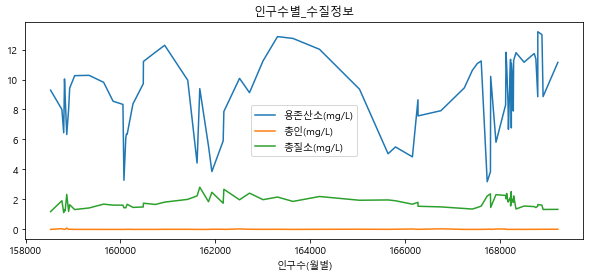

In [139]:
sample = water_total.pivot_table(index=['인구수(월별)'],values=['용존산소(mg/L)','총질소(mg/L)','총인(mg/L)'],aggfunc='mean')
sample.plot.line(rot=0,figsize=(10,4))
plt.title('인구수별_수질정보')
plt.show()

In [162]:
water_total_rain_only=water_total[water_total['일강수량(mm)']>=5]
water_total_rain_only

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L),측정연도,측정월,일강수량(mm),인구수(월별)
46,2015-02-16,안동댐하류,11.2,2.3630,0.007000,2015,2,10.5,168142
50,2015-02-21,안동댐하류,11.2,2.4007,0.008000,2015,2,6.5,168142
74,2015-03-18,안동댐하류,11.8,2.0820,0.008333,2015,3,32.0,168129
91,2015-04-04,안동댐하류,11.1,2.2970,0.008000,2015,4,9.5,168224
92,2015-04-05,안동댐하류,11.0,2.3410,0.008000,2015,4,6.0,168224
...,...,...,...,...,...,...,...,...,...
2028,2020-09-03,안동댐하류,6.6,1.9210,0.032000,2020,9,39.7,158929
2031,2020-09-06,안동댐하류,6.0,1.5810,0.035000,2020,9,9.3,158929
2032,2020-09-07,안동댐하류,6.1,1.7990,0.036000,2020,9,37.3,158929
2037,2020-09-12,안동댐하류,6.2,1.7500,0.005000,2020,9,5.7,158929


In [163]:
water_total_rain_only.to_csv('C:/myPyCode/water_total_rain_only.csv',encoding='cp949')

In [164]:
water_by_rain = water_total_rain_only.pivot_table(index=['일강수량(mm)'],values=['용존산소(mg/L)'],aggfunc='mean')
water_by_rain

,용존산소(mg/L)
일강수량(mm),
5.0,11.100000
5.1,3.500000
5.2,12.300000
5.3,6.533333
5.4,7.600000
...,...
79.3,8.100000
84.8,3.700000
94.4,3.200000


<AxesSubplot:xlabel='일강수량(mm)'>

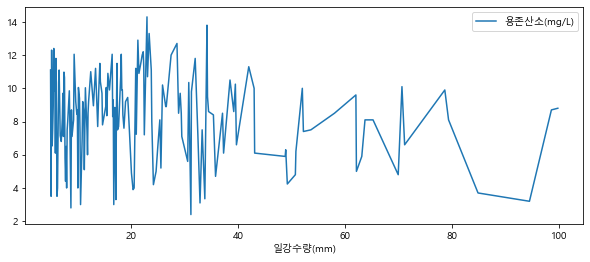

In [165]:
water_by_rain.plot.line(rot=0,figsize=(10,4))

In [166]:
water_total

,측정일시,측정소명,용존산소(mg/L),총질소(mg/L),총인(mg/L),측정연도,측정월,일강수량(mm),인구수(월별)
0,2015-01-01,안동댐하류,10.0,2.610,0.008,2015,1,0.0,168238
1,2015-01-02,안동댐하류,9.8,2.559,0.009,2015,1,0.0,168238
2,2015-01-03,안동댐하류,9.8,2.509,0.008,2015,1,0.0,168238
3,2015-01-04,안동댐하류,9.6,2.564,0.008,2015,1,0.0,168238
4,2015-01-05,안동댐하류,9.4,2.573,0.009,2015,1,0.1,168238
...,...,...,...,...,...,...,...,...,...
2143,2020-12-27,안동댐하류,8.5,1.516,0.006,2020,12,0.0,158907
2144,2020-12-28,안동댐하류,8.5,1.533,0.007,2020,12,0.0,158907
2145,2020-12-29,안동댐하류,8.6,1.626,0.006,2020,12,0.2,158907
2146,2020-12-30,안동댐하류,8.1,1.648,0.011,2020,12,0.0,158907


In [167]:
plt.figure(figsize=(8,8))
df.corr() #상관계수
sns.heatmap(df.corr(),linecolor='white',annot=True)
plt.show()

NameError: name 'df' is not defined

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

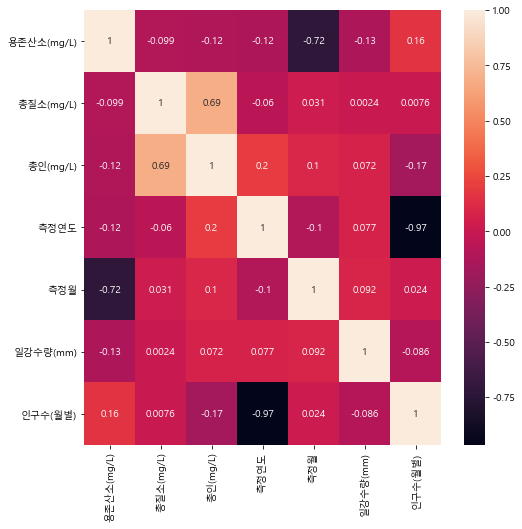

In [168]:
plt.figure(figsize=(8,8))
water_total_rain_only.iloc[:,2:].corr()
sns.heatmap(water_total_rain_only.iloc[:,2:].corr(),linecolor='white',annot=True)